# Spam Emails Detection NLP

## Abstarct

This project is to use the automated classification method of Natural Language Processing to extract relevant information such as entities, keywords and sentiments from emails for the detection of spams, spam filtering, and profanity. The target variable for this dataset is ‘spam’ in which a spam email is mapped to 1 and anything else is mapped to 0. The target variable can be thought of as what we are trying to predict. In machine learning problems, the value of this variable will be modeled and predicted by other variables. This is a binary classification problems analysis by using the Nature Language Processing to detect unsolicited and unwanted emails. The model created in this project should be able to prevent spam emails from creeping into the user's inbox, thereby improving user experience.


## Business Introduction

Spam emails can be costly to both individuals and organizations. To effectively handle the threats posted by email spams, there are huge demand for effective spam detection from machine learning techniques . This project we will practice several kind of NLP models to find out the most effective ones. The project will follow with the machine learning lige cycle to solve the following business problems:

- Obtain a general data information for Data Cleaning and formatting
- PracticeText Processing methods to determine the efficient approaches
- Explore data analysis, features engineering and selection
- Conduct Regular Expression, Name Entity Recognition and POS
- Compare different algorithms to find the best model fitting the data
- Determine Model Selection using Accuracy Matrix and other techniques
- Find out the similarity words within spam emails and ham emails
- Implementation of models to test the result
- Determine the advantage and disadvantage of each approaches



### Data set information

The original dataset is from the opensource “Spambase dataset” of the UCI machine learning repository(https://archive.ics.uci. edu/ml/datasets/spambase). The data source for this project is from Kaggle(https://www.kaggle.com/ karthickveerakumar/spam-filter). There are total 5000 rows of observations with 2 columns of features. For a better practice for bigginer, the data is imported to the file by shuffling and select only 1000 rows for the project.



In [2]:
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import re 
pd.options.display.max_colwidth = 200
import gensim


## Import dataset and Data Exploration

[Source:](https://www.kaggle.com/karthickveerakumar/spam-filter)

In [4]:
Emails = pd.read_csv('emails.csv')


In [5]:
Emails = pd.DataFrame(Emails)

In [6]:
Emails.columns = ["text","spam"]

In [7]:
Emails.head()

,text,spam
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo ...,1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or ...,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended t...",1
3,Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 33...,1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death...",1


In [8]:
Emails['text'][2]

'Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman'

In [9]:
type(Emails["text"])

pandas.core.series.Series

In [10]:
Emails.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
Emails["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [12]:
%store "Emails"

Stored 'Emails' (DataFrame)


In [13]:
email = Emails

### Randomly select 1000 rows for this project

In [14]:
import random
a = random.sample(range(0,5000),1000)
email = email.loc[a]


In [15]:
email["spam"].value_counts()

0    717
1    283
Name: spam, dtype: int64

In [16]:
%store "email"

Stored 'email' (DataFrame)


In [17]:
emails = email

In [18]:
emails["spam"].value_counts()


0    717
1    283
Name: spam, dtype: int64

In [19]:
type(emails['text'])

pandas.core.series.Series

In [20]:
emails.head()

,text,spam
97,Subject: do i require an attorney to use this system and clean up my record calls about late payments are discontinued dead in their tracks . we have pioneered an advanced system of proven strat...,1
1889,"Subject: ees operational risk per our conversation , here is the model that i have for simon . the notes that i gave you were from some work i did back in september as i was looking for volume ...",0
3250,Subject: re : hello from vince kaminski at enron dear vince . i sent you a reply earlier this month but i haven ' t heard from you about the date of your visit . our department has a seminar ev...,0
479,Subject: extraa chance how to save on your medlcatlons ove pettitoes r 60 % . pharmazm spurge ail shop - successfull and proven way to save yo compos ur m eureka oney . slowcoach v a patriot g...,1
1517,Subject: re : nick bambos sounds great . let me know how i can help . tom vince j kaminski @ ect 02 / 28 / 00 11 : 42 am to : thomas d gros / hou / ect @ ect cc : ravi thuraisingham / enron ...,0


### Visulazaion of the volums of spam emails and none spam emails

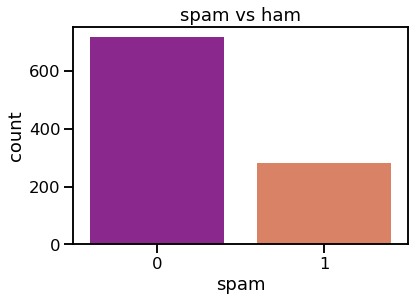

In [21]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(emails['spam'], palette="plasma")
plt.title('spam vs ham');


### Make word cloud to compare the spam emails and non spam emails



In [22]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Make two subset filter by "spam" or "ham"

In [23]:
spamdf = emails[emails['spam']== 1]
spamdf.shape

(283, 2)

In [24]:
hamdf = emails[emails["spam"] == 0]

hamdf.shape

(717, 2)

In [25]:
X_spam= np.array(spamdf['text'])
X_ham = np.array(hamdf['text'])

In [26]:
doc_spam = np.array_str(X_spam)
doc_ham = np.array_str(X_ham)

(-0.5, 399.5, 199.5, -0.5)

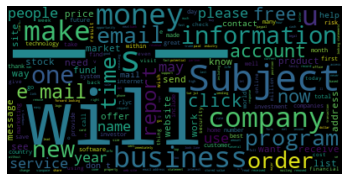

In [27]:
wordcloud = WordCloud().generate(doc_spam)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

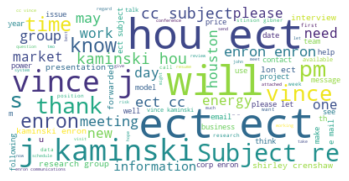

In [28]:
wordcloud = WordCloud().generate(doc_ham)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(doc_ham)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();


## Text Pre_processing

### Simple text-processing

In [29]:
emails = email

In [30]:
X = np.array(emails['text'])

In [31]:
import nltk
#nltk.download()


In [32]:

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    
    # remove of hyperlinks
    doc = re.sub(r"http\S+", "",doc)
    # remove of HTML tags
    doc = re.sub(r"'<.*?>''", "",doc)

    
    # tokenize document
    tokens = word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

normalize_corpus = np.vectorize(normalize_document)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeanbai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
X1 = normalize_corpus(X)

In [34]:
X1_df = pd.DataFrame(X1)

In [36]:
import re
import string


def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean = lambda x: clean_text(x)

In [37]:
X_clean = pd.DataFrame(X1_df[0].apply(clean))


In [38]:
X_clean

,0
0,subject require attorney use system clean record calls late payments discontinued dead tracks pioneered advanced system proven strategies get creditors debt collectors back good debt termination...
1,subject ees operational risk per conversation model simon notes gave work back september looking volume numbers notes show drives final cash flow numbers briefly issue surrounds exactly mean...
2,subject hello vince kaminski enron dear vince sent reply earlier month heard date visit department seminar every monday schedule visit monday would like invite give seminar attended many gra...
3,subject extraa chance save medlcatlons ove pettitoes r pharmazm spurge ail shop successfull proven way save yo compos ur eureka oney slowcoach v patriot g tracker l l incubatory u americanis...
4,subject nick bambos sounds great let know help tom vince j kaminski ect thomas gros hou ect ect cc ravi thuraisingham enron communications enron communications vince j kaminsk...
...,...
995,subject meeting riskcare discuss joint ventures michael curran manuel rensink richard haddow michael curran head research manuel rensink richard haddow director technology services atten...
996,subject rice course vince adjunct professor rice working wil uecker executive education concurence would like sit energy derivatives course understand wil students registered course consent...
997,subject big unit within days notice immediate erection size increases forget partner faking orgasm able please able penetrate deeper partner experience pleasure well multiple orgasms sexual inte...
998,subject e commerce continental europe anjam would good opportunity update content intranet site expand coverage new areas arrange resources us everyone research works developing content ne...


In [39]:
norm_X = np.array(X_clean[0])

In [40]:
emails['norm_X'] = norm_X

In [41]:
emails[1:3]

,text,spam,norm_X
1889,"Subject: ees operational risk per our conversation , here is the model that i have for simon . the notes that i gave you were from some work i did back in september as i was looking for volume ...",0,subject ees operational risk per conversation model simon notes gave work back september looking volume numbers notes show drives final cash flow numbers briefly issue surrounds exactly mean...
3250,Subject: re : hello from vince kaminski at enron dear vince . i sent you a reply earlier this month but i haven ' t heard from you about the date of your visit . our department has a seminar ev...,0,subject hello vince kaminski enron dear vince sent reply earlier month heard date visit department seminar every monday schedule visit monday would like invite give seminar attended many gra...


In [42]:
norm_emails = emails

In [43]:
norm_emails.to_csv('norm_emails.csv') 


## Use spaCy to remove more stop word

In [44]:
import spacy
nlp = spacy.load("en_core_web_lg")


all_stopwords = nlp.Defaults.stop_words


def normalize_document(doc):
    
    # tokenize document
    tokens = word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if not token in all_stopwords]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

spacy_corpus1 = np.vectorize(normalize_document)


nlp_X = spacy_corpus1(norm_X)

In [45]:

nlp.Defaults.stop_words |= {'pm', 'com','cc','please','ect','http','www',}


def normalize_document(doc):
    
    # tokenize document
    tokens = word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if not token in nlp.Defaults.stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

spacy_corpus2 = np.vectorize(normalize_document)


In [46]:
nlp_X = spacy_corpus2(nlp_X)

nlp_emails = pd.DataFrame(nlp_X)
nlp_emails.rename(columns={0:"nlp_X"}, inplace=True)

nlp_emails[0:2]

,nlp_X
0,subject require attorney use system clean record calls late payments discontinued dead tracks pioneered advanced system proven strategies creditors debt collectors good debt termination program le...
1,subject ees operational risk conversation model simon notes gave work september looking volume numbers notes drives final cash flow numbers briefly issue surrounds exactly meant nonmarket noncredi...


### Make Bag of Words Model

Text processing, tokenizing and stopwords are all included in sklearn CountVectorizer.

Fit vectorize to the data(build a vocabulary, count the number of words). then transform the original text to vector

### Bag of Words Model

In [47]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(min_df=0., max_df=1.)
cv_nlp_X = cv.fit_transform(nlp_X)

cv_nlp_X = cv_nlp_X.toarray()

cv_nlp_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
len(vocab)

14471

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

nlp_X_tfidf = tfidf_transformer.fit_transform(cv_nlp_X)

nlp_X_tfidf.shape

(1000, 14471)

### TF-IDF Model

#### Process vectorization and Tfidf by using one line of coding

Convert a collection of raw documents to a matrix of TF-IDF features.
Equivalent to CountVectorizer followed by TfidfTransformer.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True, stop_words='english')
tv_nlp_X = tv.fit_transform(nlp_X)
tv_nlp_X = tv_nlp_X.toarray()

vocab = tv.get_feature_names()
#pd.DataFrame(np.round(tv_train_matrix, 2), columns=vocab)
len(vocab)

14449

In [52]:
tv_nlp_X.shape

(1000, 14449)

In [53]:
tv_nlp_X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Document Similarity

Use similarity metric, cosine similarity and compare pairwise document similarity based on their TF-IDF feature vectors

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_nlp_X = cosine_similarity(tv_nlp_X)

similarity_df_nlp_X = pd.DataFrame(similarity_matrix_nlp_X)
similarity_df_nlp_X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.004467,0.038434,0.010395,0.000759,0.000694,0.010087,0.001787,0.023391,0.000415,...,0.007016,0.014939,0.008249,0.007969,0.007822,0.000587,0.006139,0.044498,0.002473,0.000390
1,0.004467,1.000000,0.012480,0.006893,0.013010,0.004925,0.003947,0.032042,0.007277,0.031337,...,0.016658,0.018653,0.027027,0.009934,0.008408,0.005703,0.011911,0.028896,0.022329,0.014290
2,0.038434,0.012480,1.000000,0.000741,0.082917,0.071568,0.001035,0.022951,0.064291,0.028364,...,0.110743,0.028634,0.100442,0.009519,0.084161,0.015359,0.042797,0.010815,0.044393,0.014354
3,0.010395,0.006893,0.000741,1.000000,0.000852,0.000779,0.000673,0.000384,0.000422,0.000466,...,0.005026,0.000778,0.000713,0.000329,0.000912,0.000658,0.000730,0.000400,0.000858,0.000438
4,0.000759,0.013010,0.082917,0.000852,1.000000,0.030620,0.001191,0.020908,0.007573,0.000824,...,0.074559,0.031662,0.131108,0.005086,0.077285,0.010199,0.041213,0.000708,0.062463,0.000775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000587,0.005703,0.015359,0.000658,0.010199,0.011491,0.000920,0.018045,0.033290,0.010762,...,0.007115,0.023319,0.023708,0.007114,0.001246,1.000000,0.000997,0.000547,0.018728,0.000598
996,0.006139,0.011911,0.042797,0.000730,0.041213,0.076161,0.001020,0.028839,0.014523,0.004470,...,0.031885,0.008704,0.052212,0.004687,0.026263,0.000997,1.000000,0.012199,0.056919,0.000664
997,0.044498,0.028896,0.010815,0.000400,0.000708,0.007559,0.039522,0.007012,0.003309,0.020301,...,0.005477,0.029824,0.024311,0.022876,0.007220,0.000547,0.012199,1.000000,0.001971,0.019094
998,0.002473,0.022329,0.044393,0.000858,0.062463,0.009569,0.001199,0.057412,0.012753,0.062622,...,0.051809,0.036218,0.053138,0.019599,0.028266,0.018728,0.056919,0.001971,1.000000,0.012441


### Document Clustering with Similarity Features

There are two types of hierarchical clustering algorithms namely, agglomerative and divisive methods. I will be using a agglomerative clustering algorithm, which is hierarchical clustering using a bottom up approach i.e. each observation or document starts in its own cluster and clusters are successively merged together using a distance metric which measures distances between data points and a linkage merge criterion. Will use the Ward method to govern the mergo strategy.

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix_nlp_X, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')


,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,21,446,0,2
1,44,656,0,2
2,139,515,0,2
3,140,986,0,2
4,169,683,0,2
...,...,...,...,...
994,1956,1988,8.96167,337
995,1992,1993,9.10367,563
996,1990,1994,9.41232,427
997,1779,1995,10.6033,573


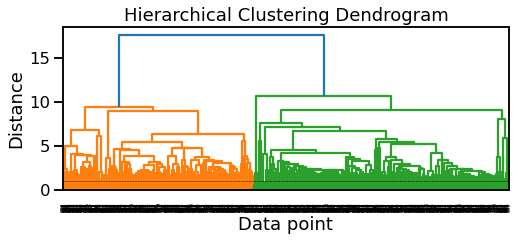

In [58]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5);


### Topic Models

Use Latent Dirichlet Allocation (LDA),which uses a generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic.

In [59]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=0)
dt_matrix = lda.fit_transform(tv_nlp_X)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3','T4','T5'])
features


,T1,T2,T3,T4,T5
0,0.508314,0.023467,0.421296,0.023470,0.023453
1,0.930613,0.017351,0.017347,0.017341,0.017347
2,0.916953,0.020764,0.020761,0.020761,0.020761
3,0.897342,0.025466,0.026126,0.025722,0.025343
4,0.890688,0.027326,0.027326,0.027333,0.027327
...,...,...,...,...,...
995,0.433982,0.440611,0.041656,0.042096,0.041656
996,0.856568,0.035859,0.035858,0.035858,0.035857
997,0.500542,0.021233,0.021215,0.435774,0.021237
998,0.915057,0.021216,0.021201,0.021201,0.021325


In [60]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic[0:10])
    

[('enron', 42.94623340475713), ('vince', 39.0592520725271), ('subject', 29.118920533844637), ('hou', 25.48118814382884), ('kaminski', 23.17849218689364), ('research', 16.52003111656732), ('thanks', 16.055239970889687), ('group', 15.665705567176255), ('know', 14.647345156650685), ('time', 14.309471450280311)]
[('ibuyit', 1.890780403065729), ('elsb', 1.6067400241284946), ('man', 1.353619084313283), ('viagra', 1.1965297247207756), ('dysfunction', 1.1385017505902024), ('save', 1.1337569559804712), ('nbp', 1.1301560015087544), ('hello', 1.0842989815859645), ('convinient', 1.0796969111623689), ('jokes', 1.0796969111623689)]
[('pep', 1.677628662057179), ('reviewers', 1.639526577133773), ('approver', 1.4756765706249892), ('save', 1.2436697332128426), ('projecthoneypot', 1.1553651202097002), ('viagra', 1.1112799746630102), ('proven', 1.0543432296283364), ('zingales', 0.999194168453122), ('dailyupdate', 0.987864363388474), ('enl', 0.987864363388474)]
[('adobe', 5.411470783509837), ('order', 3.40

### Document Clustering with Topic Model Features

In [61]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([nlp_emails, cluster_labels], axis=1)


array([[0.5233603 , 0.77378343, 0.84707052, 0.19589298, 0.72849388],
       [0.08039934, 0.92382032, 1.00611293, 0.77918579, 0.86038246],
       [0.06515433, 0.91129794, 0.99375459, 0.76662338, 0.84793168],
       ...,
       [0.53629662, 0.32486625, 0.85285294, 0.67485999, 0.73593523],
       [0.06303547, 0.90958971, 0.99198372, 0.76490902, 0.84622592],
       [0.07846101, 0.78087512, 0.91785616, 0.69080768, 0.77223838]])

,nlp_X,ClusterLabel
0,subject require attorney use system clean record calls late payments discontinued dead tracks pioneered advanced system proven strategies creditors debt collectors good debt termination program le...,3
1,subject ees operational risk conversation model simon notes gave work september looking volume numbers notes drives final cash flow numbers briefly issue surrounds exactly meant nonmarket noncredi...,0
2,subject hello vince kaminski enron dear vince sent reply earlier month heard date visit department seminar monday schedule visit monday like invite seminar attended graduate students faculty oppor...,0
3,subject extraa chance save medlcatlons ove pettitoes r pharmazm spurge ail shop successfull proven way save yo compos ur eureka oney slowcoach v patriot g tracker l l incubatory u americanism l de...,0
4,subject nick bambos sounds great let know help tom vince j kaminski thomas gros hou ravi thuraisingham enron communications enron communications vince j kaminski hou stinson gibner hou subject nic...,0
...,...,...
995,subject meeting riskcare discuss joint ventures michael curran manuel rensink richard haddow michael curran head research manuel rensink richard haddow director technology services attendance cont...,4
996,subject rice course vince adjunct professor rice working wil uecker executive education concurence like sit energy derivatives course understand wil students registered course consent let know mat...,0
997,subject big unit days notice immediate erection size increases forget partner faking orgasm able able penetrate deeper partner experience pleasure multiple orgasms sexual intercourse women surveye...,1
998,subject e commerce continental europe anjam good opportunity update content intranet site expand coverage new areas arrange resources research works developing content need publish intranet though...,0


#### Use the CountVectorizer treat the all text of emails dataset to view top 10 words for each topic

create a new emails date with the norm_X.

In [62]:
cv = CountVectorizer(max_df=0.95, min_df=2)

In [63]:
dtm = cv.fit_transform(nlp_emails['nlp_X'])

In [64]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=0)

In [65]:
dtm

<1000x6655 sparse matrix of type '<class 'numpy.int64'>'
	with 67316 stored elements in Compressed Sparse Row format>

In [66]:
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['business', 'new', 'management', 'gas', 'year', 'information', 'company', 'power', 'energy', 'market']


THE TOP 10 WORDS FOR TOPIC #1
['account', 'send', 'information', 'address', 'new', 'money', 'business', 'energy', 'mail', 'email']


THE TOP 10 WORDS FOR TOPIC #2
['shirley', 'group', 'know', 'time', 'interview', 'edu', 'research', 'kaminski', 'enron', 'vince']


THE TOP 10 WORDS FOR TOPIC #3
['var', 'prices', 'new', 'click', 'business', 'time', 'price', 'power', 'message', 'model']


THE TOP 10 WORDS FOR TOPIC #4
['know', 'forwarded', 'corp', 'research', 'group', 'thanks', 'kaminski', 'vince', 'hou', 'enron']





### Attaching Discovered Topic Labels to Original Articles

In [67]:
topic_results = lda.transform(dtm)

In [68]:
topic_results.argmax()

550

In [69]:
nlp_emails['topic'] = topic_results.argmax(axis=1)

In [70]:
nlp_emails[0:5]

,nlp_X,topic
0,subject require attorney use system clean record calls late payments discontinued dead tracks pioneered advanced system proven strategies creditors debt collectors good debt termination program le...,1
1,subject ees operational risk conversation model simon notes gave work september looking volume numbers notes drives final cash flow numbers briefly issue surrounds exactly meant nonmarket noncredi...,3
2,subject hello vince kaminski enron dear vince sent reply earlier month heard date visit department seminar monday schedule visit monday like invite seminar attended graduate students faculty oppor...,2
3,subject extraa chance save medlcatlons ove pettitoes r pharmazm spurge ail shop successfull proven way save yo compos ur eureka oney slowcoach v patriot g tracker l l incubatory u americanism l de...,3
4,subject nick bambos sounds great let know help tom vince j kaminski thomas gros hou ravi thuraisingham enron communications enron communications vince j kaminski hou stinson gibner hou subject nic...,4


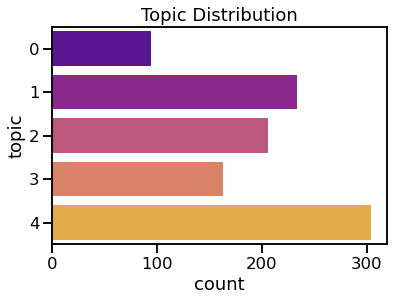

In [71]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(y=nlp_emails['topic'], palette="plasma")
plt.title('Topic Distribution');

### Use the components index to find a single topic for each array as an example

In [72]:
single_topic = lda.components_[2]

In [73]:
single_topic.argsort()

array([4912, 1782, 3906, ..., 3226, 1962, 6381])

In [74]:
single_topic[100]
#Top 10 words for this topic at the number 1055 email.

single_topic.argsort()[-10:]

top_word_indices = single_topic.argsort()[-10:]
#Get the text information of this top 10 words

for index in top_word_indices:
    print(cv.get_feature_names()[index])

3.196849725655368

array([5458, 2595, 3278, 6064, 3044, 1848, 5063, 3226, 1962, 6381])

shirley
group
know
time
interview
edu
research
kaminski
enron
vince


In [78]:
norm_emails["nlp_X"] = nlp_X

In [ ]:
nlp_emails = norm_emails

In [82]:
nlp_emails[0:3]

,text,spam,norm_X,nlp_X
97,Subject: do i require an attorney to use this system and clean up my record calls about late payments are discontinued dead in their tracks . we have pioneered an advanced system of proven strat...,1,subject require attorney use system clean record calls late payments discontinued dead tracks pioneered advanced system proven strategies get creditors debt collectors back good debt termination...,subject require attorney use system clean record calls late payments discontinued dead tracks pioneered advanced system proven strategies creditors debt collectors good debt termination program le...
1889,"Subject: ees operational risk per our conversation , here is the model that i have for simon . the notes that i gave you were from some work i did back in september as i was looking for volume ...",0,subject ees operational risk per conversation model simon notes gave work back september looking volume numbers notes show drives final cash flow numbers briefly issue surrounds exactly mean...,subject ees operational risk conversation model simon notes gave work september looking volume numbers notes drives final cash flow numbers briefly issue surrounds exactly meant nonmarket noncredi...
3250,Subject: re : hello from vince kaminski at enron dear vince . i sent you a reply earlier this month but i haven ' t heard from you about the date of your visit . our department has a seminar ev...,0,subject hello vince kaminski enron dear vince sent reply earlier month heard date visit department seminar every monday schedule visit monday would like invite give seminar attended many gra...,subject hello vince kaminski enron dear vince sent reply earlier month heard date visit department seminar monday schedule visit monday like invite seminar attended graduate students faculty oppor...


In [83]:
nlp_emails.to_csv("nlp_emails.csv")
